<a href="https://colab.research.google.com/github/jdvallad/Math-152/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Exploration 1 - Gauss's Circle Conjecture**
 

In [6]:
import math
import numpy as np
from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt

We begin with a no optimizations brute force approach that simply parses each $x$ value in the set $\{0, 1,...,r\}$, and each $y$ value in the set $\{1, ..., r\}$, and checks if $x^2+y^2 < r^2$ and if so adds it as a lattice point. However this only counts the lattice points in one quadrant of the circle, so we multiply the final count by 4, and finally we add 1 for the point $(0, 0)$ which is skipped.

In [104]:
def bf_L(r):
    lattice_points = 0
    for i in range(r + 1):
        for j in range(1, r + 1):
            if i**2 + j**2 <= r**2:
                lattice_points += 1
    return 4 * lattice_points + 1

print(bf_L(0))
print(bf_L(1))
print(bf_L(2))
print(bf_L(3))

1
5
13
29


We now define an area function A, a lattice counting function L, and an error function E.

In [20]:
import math

def A(r):
  return r**2 * math.pi


def L(r):
  i = 1
  ans = 0
  while i <= r:
    ans += math.floor(math.sqrt(r**2 - i**2)) + 1
    i += 1
  return 1 + ans * 4


def E(r):
  return A(r) - L(r)


To get a sense of how the error grows with R, we will perform a power regression on a list of values from the function E.

In [133]:
x = []
y = []


print("Creating list of errors, in log space so we can do a linear regression")
for i in range(1, 1000):
  error = E(i)
  if error > 0:
    x.append(math.log(i))
    y.append(math.log(E(i)))
print("Finished")



c, stats = P.polyfit(x, y, 1, full=True)
print("\nResult...\n", c)
print("\nResult...\n", stats)

Creating list of errors, in log space so we can do a linear regression
Finished

Result...
 [-0.2399114   0.67853623]

Result...
 [array([359.13952698]), 2, array([1.41013425, 0.10733775]), 2.1760371282653068e-13]


Plotting graphs so we can get a better look

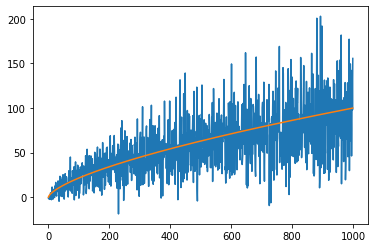

In [134]:
import matplotlib.pyplot as plt


x = []
error_y = []
r_2_3 = []

for i in range(1000):
    x.append(i)
    error_y.append(E(i))
    r_2_3.append(i**(2/3))

fig, ax = plt.subplots()
ax.plot(x, error_y)
ax.plot(x, r_2_3)
plt.show()

An obvious generalization of this problem that merits inspection is to see how this idea extends to shapes beyond circles. Furthermore, we will see how if this idea extends to volume as opposed to area. 

**Area of an ellipse**

In [ ]:
def ellipse_A(a,b):
  return math.pi*a*b

**Lattice points of an ellipse**

In [ ]:
def equation_satisfied(x, y, a, b):
  return (x**2)/(a**2)+(y**2)/(b**2) <= 1

def ellipse_L(a, b):
  quad_one_points = 0
  i = 1
  while i < abs(a)+1:
    j=1
    while j < abs(b)+1:
      if equation_satisfied(i, j, a, b):
        quad_one_points += 1
      j = j + 1
    i = i + 1
  axis_points = (a+b)*2 + 1
  return quad_one_points*4 + axis_points

**Volume of a sphere**

In [116]:
def volume_sphere(r):
    return (4 / 3) * math.pi * r**3

def bf_lattice_sphere(r):
    lattice_points = 0
    for i in range(-r,r + 1):
        for j in range(-r,r + 1):
            for k in range(-r, r + 1):
                if i**2 + j**2 + k**2 <= r**2:
                    lattice_points += 1
    return lattice_points

def faster_bf_lattice_sphere(r):
  nonzero_lattice_points = 0
  for i in range(1,r + 1):
        for j in range(1,r + 1):
            for k in range(1,r + 1):
                if i**2 + j**2 + k**2 <= r**2:
                    nonzero_lattice_points += 1
  nonzero_lattice_points *= 8 # points sitting on 0 axis interior to sphere
  axis_circles = 3 * ( bf_L(r) - 1) # points sitting on 1 or 2 axis interior to the sphere
  overcounted_axis_lines = 6 * r # points sitting on 2 axis interior to sphere
  origin = 1 # points sitting on all 3 axis interior to sphere
  return nonzero_lattice_points + axis_circles - overcounted_axis_lines + origin

def fastest_bf_lattice_sphere(r):
  nonzero_lattice_points = 0
  for i in range(1,r + 1):
        for j in range(1,math.floor(math.sqrt(r**2 - i**2)) + 1):
          nonzero_lattice_points += math.floor(math.sqrt(r**2 - i**2 - j**2))
  nonzero_lattice_points *= 8 # points sitting on 0 axis interior to sphere
  axis_circles = 3 * ( bf_L(r) - 1) # points sitting on 1 or 2 axis interior to the sphere
  overcounted_axis_lines = 6 * r # points sitting on 2 axis interior to sphere
  origin = 1 # points sitting on all 3 axis interior to sphere
  return nonzero_lattice_points + axis_circles - overcounted_axis_lines + origin

We take a similar approach as before, but now we have 3 different dimensions to loop over. We only deal with strictly positive lattice points, and by symmetry uncounted lattice points can be found by switching the sign on points i,j,k. This gives us 2^3 = 8 different unique lattice points for given positive lattice point (i,j,k). We begin with a brute force approach as before.

This method is quite slow, so we will try to create a more efficent version.

In [123]:
def lattice_sphere(r):
  nonzero_lattice_points = 0
  for i in range(1,r + 1):
        for j in range(1,math.floor(math.sqrt(r**2 - i**2)) + 1):
          nonzero_lattice_points += math.floor(math.sqrt(r**2 - i**2 - j**2))
  nonzero_lattice_points *= 8 # points sitting on 0 axis interior to sphere
  axis_circles = 3 * ( bf_L(r) - 1) # points sitting on 1 or 2 axis interior to the sphere
  overcounted_axis_lines = 6 * r # points sitting on 2 axis interior to sphere
  origin = 1 # points sitting on all 3 axis interior to sphere
  return nonzero_lattice_points + axis_circles - overcounted_axis_lines + origin

This implementation is much faster, cutting down on the upper bound on the 2nd loop and getting rid of the third loop completely. We will now populate an array with error values from radius 1 through 1000.

In [144]:
def sphere_error(r):
    return volume_sphere(r)  - lattice_sphere(r)

errors = []
errors.append(0)
for i in range(1, 1000):
  errors.append(sphere_error(i))

In [145]:
x = []
y = []


print("Creating list of errors, in log space so we can do a linear regression")
for i in range(1, 1000):
  error = errors[i]
  if error > 0:
    x.append(math.log(i))
    y.append(math.log(error))
print("Finished")



c, stats = P.polyfit(x, y, 1, full=True)
print("\nResult...\n", c)
print("\nResult...\n", stats)

Creating list of errors, in log space so we can do a linear regression
Finished

Result...
 [0.40944801 1.25598148]

Result...
 [array([647.33484186]), 2, array([1.41005146, 0.10841994]), 2.0228263508670352e-13]


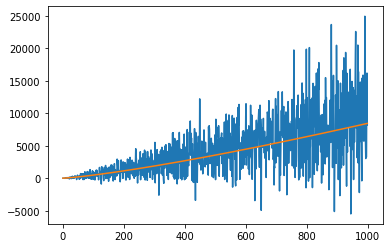

In [146]:
import matplotlib.pyplot as plt


x = []
error_y = []
r_2_3 = []

for i in range(1000):
    x.append(i)
    error_y.append(errors[i])
    r_2_3.append((3/2)* i**(5/4))

fig, ax = plt.subplots()
ax.plot(x, error_y)
ax.plot(x, r_2_3)
plt.show()

Graph below...